In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
r=pd.read_csv(r"C:\Users\Jessy Johensy\Documents\jessy\iris flower\IRIS.csv")
r

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [96]:
r.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [97]:
r.shape

(150, 5)

In [98]:
r.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [99]:
r.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [100]:
x=r[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
y=r[['species']]
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [102]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.45)

In [103]:
xtrain.shape

(82, 4)

In [104]:
xtest.shape

(68, 4)

In [105]:
ytrain.shape

(82, 1)

In [106]:
ytest.shape

(68, 1)

In [107]:
#BUILDING MODELS
#DECISION TREE CLASSIFIER
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(ytrain)
clf = DecisionTreeClassifier()
clf.fit(xtrain, training_scores_encoded)

confidence = clf.score(xtrain, training_scores_encoded)
print(confidence)

1.0


C:\Users\Jessy Johensy\New Folder\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
from sklearn.ensemble import AdaBoostClassifier
c=AdaBoostClassifier()
c.fit(x,y)
D=c.predict(xtest)
E=accuracy_score(ytest,D)
E

C:\Users\Jessy Johensy\New Folder\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9558823529411765

In [109]:
#GRADIENTBOOSTINGCLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
c=GradientBoostingClassifier()
c.fit(x,y)
D=c.predict(xtest)
E=accuracy_score(ytest,D)
E

C:\Users\Jessy Johensy\New Folder\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [110]:
prediction=c.predict([[4.9,3.0,1.4,0.2]])
prediction

C:\Users\Jessy Johensy\New Folder\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [143]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,D)
cm

array([[26,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 22]], dtype=int64)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(ytest,D))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        26
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        22

       accuracy                           1.00        68
      macro avg       1.00      1.00      1.00        68
   weighted avg       1.00      1.00      1.00        68



C:\Users\Jessy Johensy\AppData\Local\Temp\ipykernel_21296\121907286.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(r.corr(),annot=True,linewidths=1)


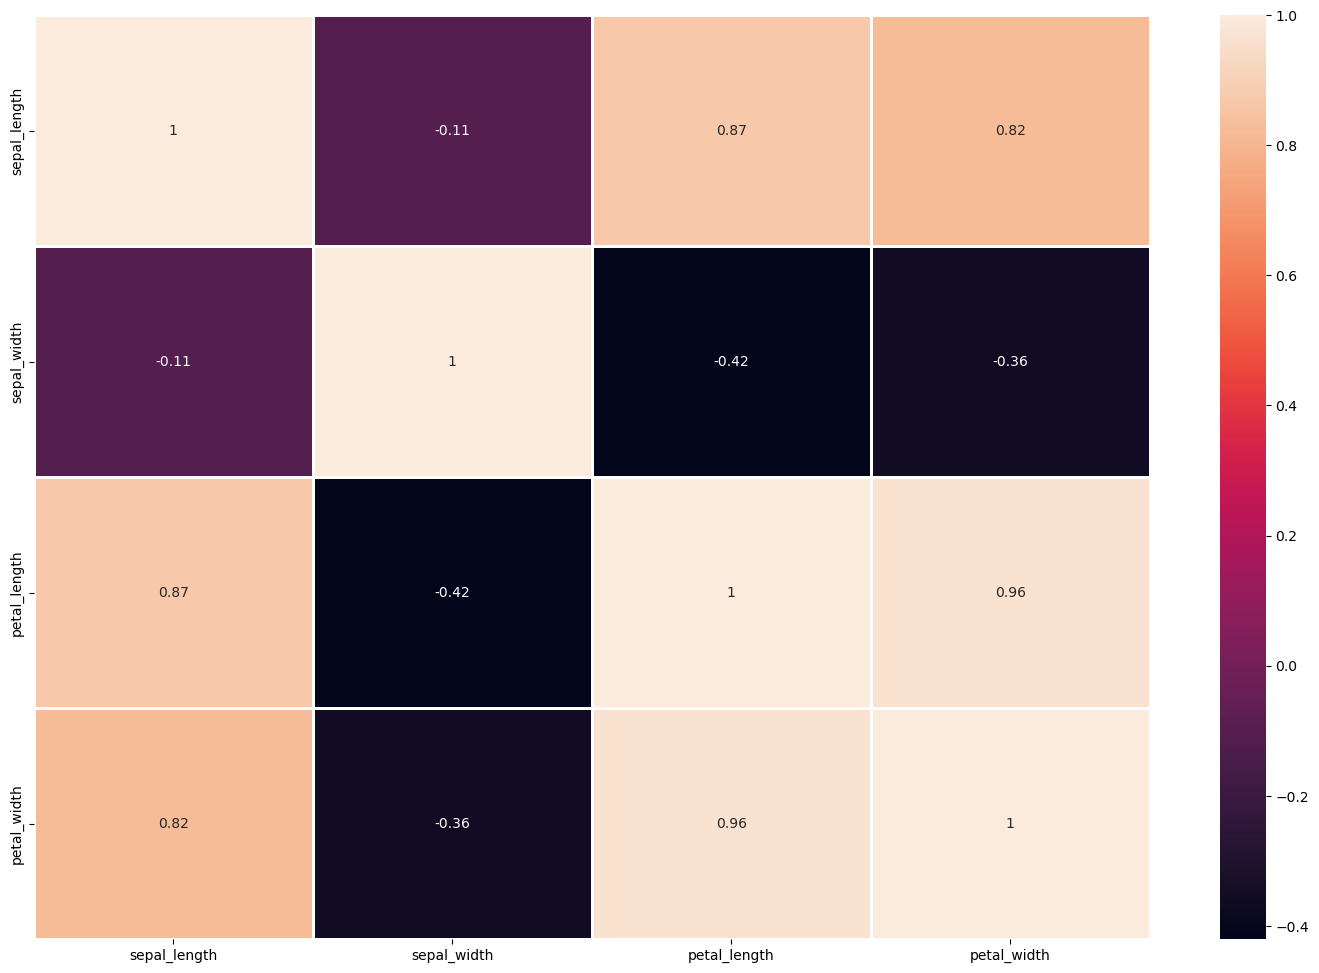

In [145]:
#DATA VISUALIZATON
fig,ax=plt.subplots(1,1,figsize=(18,12))
sns.heatmap(r.corr(),annot=True,linewidths=1)
plt.show()

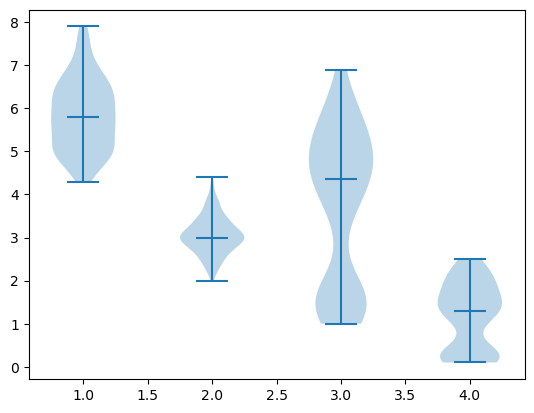

In [146]:
plt.violinplot(x,showmedians=True)
plt.show()

<Axes: >

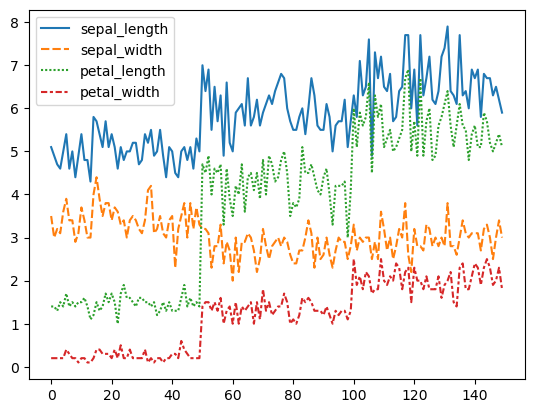

In [147]:
sns.lineplot(x)

<Axes: ylabel='Density'>

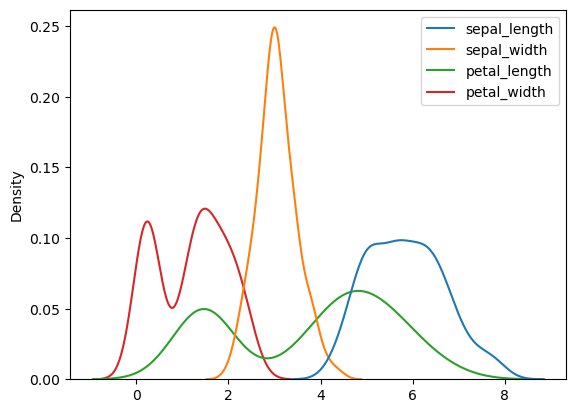

In [148]:
sns.kdeplot(x)


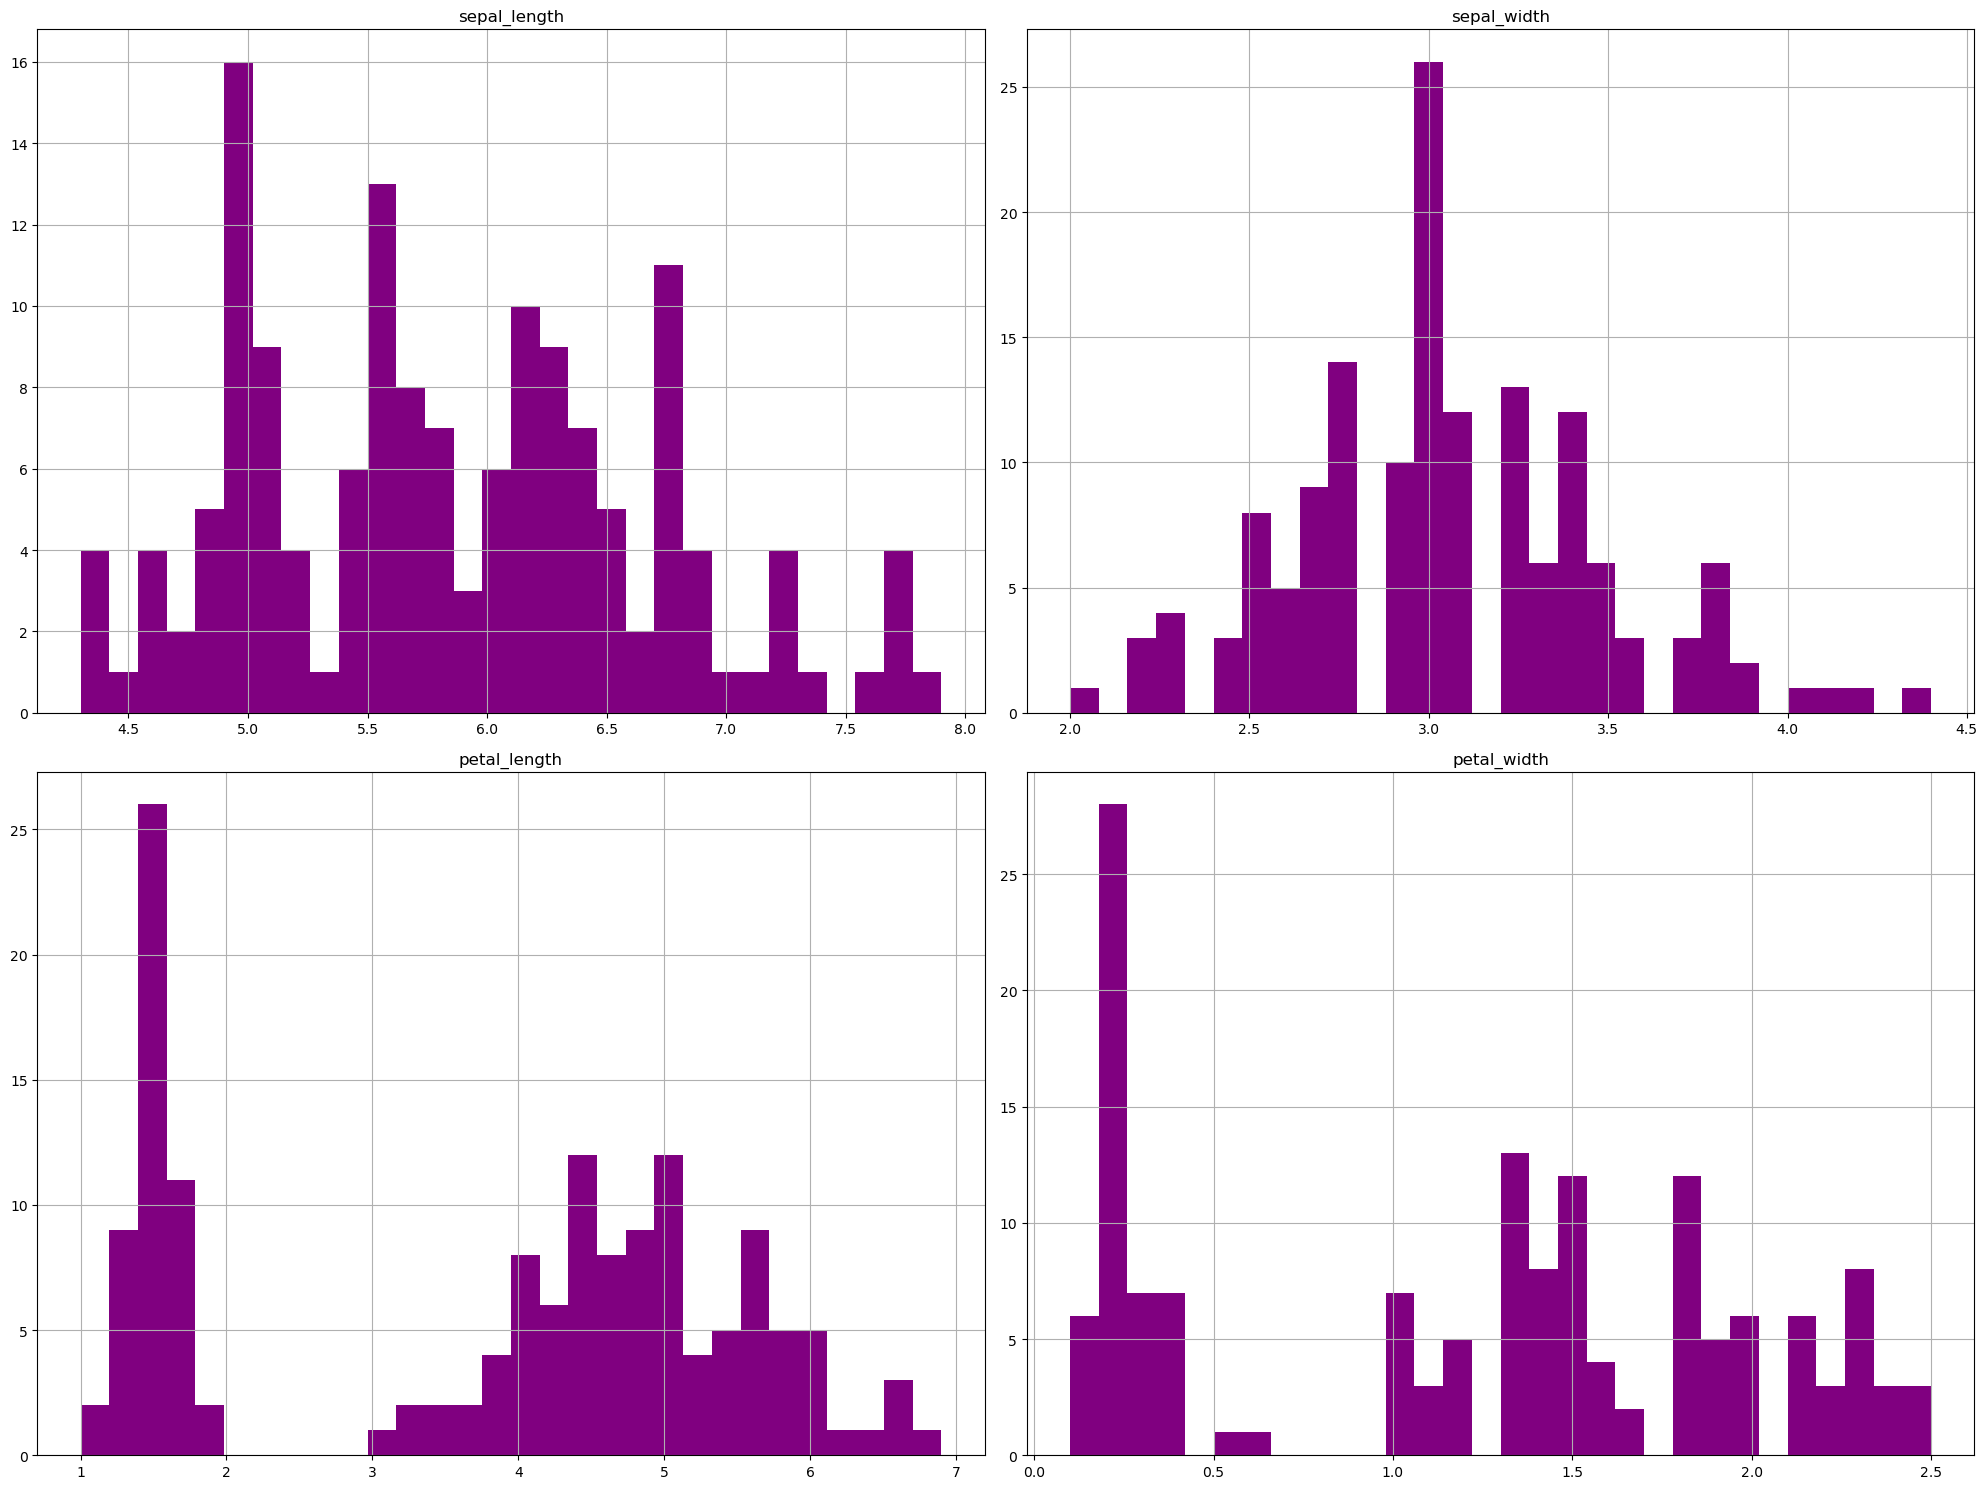

In [151]:

r.hist(bins=30, figsize=(20,15), color='purple')
plt.tight_layout()
plt.show()

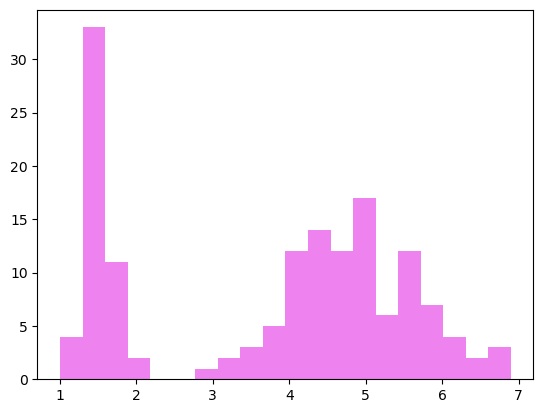

In [159]:
plt.hist(r["petal_length"], bins=20, color='violet')
plt.show()

<Axes: >

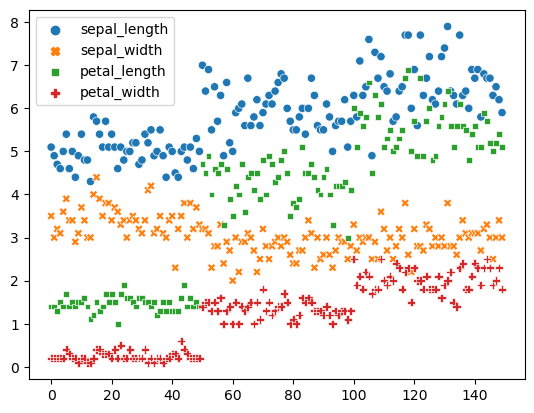

In [129]:
#visualizing the data with a scatter plot and pandas
#plotting
sns.scatterplot(x)

<Axes: >

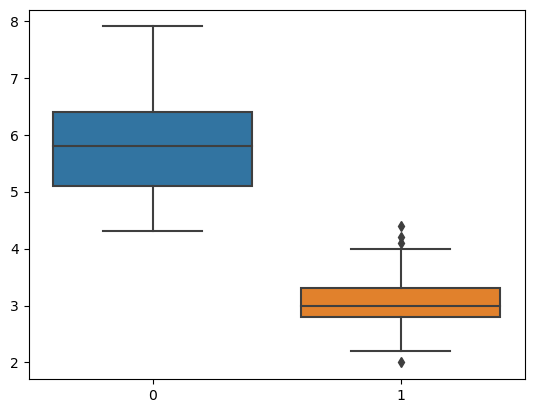

In [135]:
#Bivariate data :
#Using the box plot
sns.boxplot((x['sepal_length'], x['sepal_width']))

In [136]:
r.skew()


C:\Users\Jessy Johensy\AppData\Local\Temp\ipykernel_21296\2065153310.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  r.skew()


sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

C:\Users\Jessy Johensy\New Folder\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jessy Johensy\New Folder\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jessy Johensy\New Folder\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

C:\Users\Jessy Johensy\New Folder\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jessy Johensy\New Folder\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jessy Johensy\New Folder\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


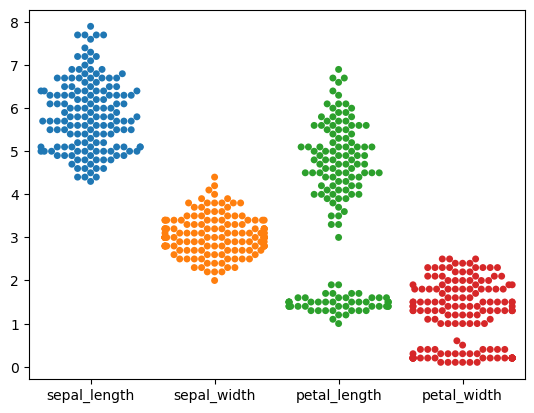

In [138]:
#swarm plot with Pandas
sns.swarmplot(x)